In [1]:
#!pip install mlrose-hiive

In [2]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

from tilemap_opt import *

In [3]:
tilemap_constraints = TilemapConstraints.from_rules([
    ('sand', 'NESW', 'sand'),
    ('water', 'NESW', 'water'),
    
    ('sand_water_north', 'N', 'water'),
    ('sand_water_north', 'S', 'sand'),
    ('sand_water_north', 'EW', 'sand_water_north'),
    ('sand_water_north', 'E', 'sand_water_northeast'),
    ('sand_water_north', 'W', 'sand_water_northwest'),
    
    ('sand_water_east', 'E', 'water'),
    ('sand_water_east', 'W', 'sand'),
    ('sand_water_east', 'NS', 'sand_water_east'),
    ('sand_water_east', 'N', 'sand_water_northeast'),
    ('sand_water_east', 'S', 'sand_water_southeast'),
    
    ('sand_water_northeast', 'NE', 'water'),
    #('sand_water_northeast', 'SW', 'sand'),
    
    ('sand_water_south', 'S', 'water'),
    ('sand_water_south', 'N', 'sand'),
    ('sand_water_south', 'EW', 'sand_water_south'),
    ('sand_water_south', 'E', 'sand_water_southeast'),
    ('sand_water_south', 'W', 'sand_water_southwest'),
    
    ('sand_water_southeast', 'SE', 'water'),
    #('sand_water_southeast', 'NW', 'sand'),
    
    ('sand_water_west', 'W', 'water'),
    ('sand_water_west', 'E', 'sand'),
    ('sand_water_west', 'NS', 'sand_water_west'),
    ('sand_water_west', 'N', 'sand_water_northwest'),
    ('sand_water_west', 'S', 'sand_water_southwest'),
    
    ('sand_water_southwest', 'SW', 'water'),
    #('sand_water_southwest', 'NE', 'sand'),
    
    ('sand_water_northwest', 'NW', 'water'),
    #('sand_water_northwest', 'SE', 'sand')
])

In [4]:
# tilemap_constraints = TilemapConstraints.from_rules([
#     ('grass', 'NESW', 'grass'),
#     ('sand', 'NESW', 'sand'),
#     ('water', 'NESW', 'water'),
#     ('sand', 'NESW', 'water'),
#     ('grass', 'NESW', 'sand')
# ])

problem = TilemapGeneration((10, 10), tilemap_constraints)
schedule = mlrose.ExpDecay()
#best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=1000)
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, max_attempts=10, max_iters=100)
print('The best state found is: ', best_state)
print('The fitness at the best state is: ', best_fitness)

The best state found is:  [1 1 8 7 5 1 1 8 9 0 2 4 1 6 1 4 2 5 6 7 7 3 1 6 1 9 6 3 1 1 1 4 6 6 1 4 8
 1 1 1 3 0 4 5 1 4 0 4 2 3 8 6 9 1 3 1 2 8 0 0 1 1 9 7 3 8 6 1 9 8 2 4 8 0
 5 1 1 1 4 1 5 8 7 4 7 6 1 1 1 1 5 1 1 1 1 1 1 4 3 1]
The fitness at the best state is:  0.31


(160, 160, 3)


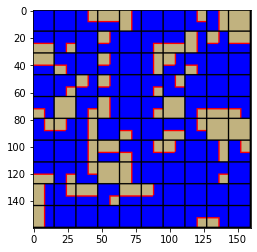

In [5]:
grass = (0, 1.0, 0)
sand = (0.76, 0.7, 0.5)
water = (0, 0, 1.0)

tilemap_images = {
    'grass': np.full((16, 16, 3), fill_value=grass),
    'sand': np.full((16, 16, 3), fill_value=sand),
    'water': np.full((16, 16, 3), fill_value=water),
}

tilemap_images['sand_water_north'] = np.full((16, 16, 3), fill_value=sand)
tilemap_images['sand_water_north'][:8, :, :] = water
tilemap_images['sand_water_north'][8, :, :] = (1.0, 0, 0)

tilemap_images['sand_water_east'] = np.full((16, 16, 3), fill_value=sand)
tilemap_images['sand_water_east'][:, 8:, :] = water
tilemap_images['sand_water_east'][:, 8, :] = (1.0, 0, 0)

tilemap_images['sand_water_south'] = np.full((16, 16, 3), fill_value=sand)
tilemap_images['sand_water_south'][8:, :, :] = water
tilemap_images['sand_water_south'][8, :, :] = (1.0, 0, 0)

tilemap_images['sand_water_west'] = np.full((16, 16, 3), fill_value=sand)
tilemap_images['sand_water_west'][:, :8, :] = water
tilemap_images['sand_water_west'][:, 8, :] = (1.0, 0, 0)

tilemap_images['sand_water_northeast'] = np.full((16, 16, 3), fill_value=water)
tilemap_images['sand_water_northeast'][8:, :8, :] = sand
tilemap_images['sand_water_northeast'][8, :8, :] = (1.0, 0, 0)
tilemap_images['sand_water_northeast'][8:, 8, :] = (1.0, 0, 0)

tilemap_images['sand_water_southeast'] = np.full((16, 16, 3), fill_value=water)
tilemap_images['sand_water_southeast'][:8, :8, :] = sand
tilemap_images['sand_water_southeast'][8, :8, :] = (1.0, 0, 0)
tilemap_images['sand_water_southeast'][:8, 8, :] = (1.0, 0, 0)

tilemap_images['sand_water_southwest'] = np.full((16, 16, 3), fill_value=water)
tilemap_images['sand_water_southwest'][:8, 8:, :] = sand
tilemap_images['sand_water_southwest'][:8, 8, :]= (1.0, 0, 0)
tilemap_images['sand_water_southwest'][8, 8:, :] = (1.0, 0, 0)

tilemap_images['sand_water_northwest'] = np.full((16, 16, 3), fill_value=water)
tilemap_images['sand_water_northwest'][8:, 8:, :] = sand
tilemap_images['sand_water_northwest'][8:, 8, :] = (1.0, 0, 0)
tilemap_images['sand_water_northwest'][8, 8:, :] = (1.0, 0, 0)

for k in tilemap_images:
    tilemap_images[k][15, :, :] = (0, 0, 0)
    tilemap_images[k][:, 15, :] = (0, 0, 0)


rasterizer = TilemapRasterizer(problem, tilemap_images)

img = rasterizer.rasterize(best_state)
print(img.shape)
plt.imshow(img)

#str_state = np.array(tilemap_constraints.stringify(best_state), dtype=str).reshape(problem.size + (-1,))
#print(str_state)